### データダウンロードと解凍

ファイルのダウンロードと解凍…って何回やるかは不明だが。

In [1]:
import requests, zipfile
from io import StringIO
import io

target_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
req = requests.get(target_url, stream=True)

zip_val = zipfile.ZipFile(io.BytesIO(req.content))
zip_val.extractall()

### ファイルの読み込み

In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

student_data_math = pd.read_csv('student-mat.csv')
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


え！？  
まさか…

In [3]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


CSV じゃねーのかよ！？

気を取り直して、情報の状態。  
各データ型とどれくらいデータが詰まってるか？(null フィールド検出)

In [4]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

#### 質的データ

数値化されていない不連続値データ。状態を表す。

In [5]:
# 質的データ：連続的なあたいのデータで、比率に意味がある
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

#### 量的データ

数値化されたデータ。比率などに意味を持つ。

In [7]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

#### 軸別に平均値を出す

In [8]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

### 統計記述

まずは利用するライブラリ

In [10]:
# Matplotlib と seaborn (ヘルパー)
import matplotlib as mpl
import seaborn as sns

# pyplot
import matplotlib.pyplot as plt

%matplotlib inline

#### ヒストグラム

どの値にどれくらいの数が集中しているのかの図

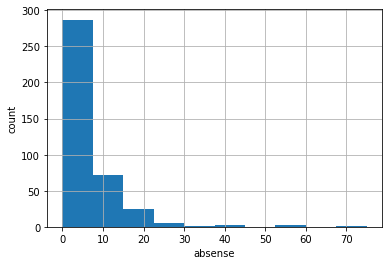

In [12]:
plt.hist(student_data_math['absences'])
plt.xlabel('absense')
plt.ylabel('count')

plt.grid(True)

#### 平均、中央、再頻出値

言葉の定義は中学数学（？）で習うと思う。

In [15]:
print('平均  : ', student_data_math['absences'].mean())
print('中央  : ', student_data_math['absences'].median())
print('再頻出:', student_data_math['absences'].mode())

平均  :  5.708860759493671
中央  :  4.0
再頻出: 0    0
dtype: int64


#### 分散と標準偏差

分散：どの程度値がばらけてるか。（平均値からの各データ二乗誤差の平均）  
`(1/データ数) * Σ((各データ - 平均)^2)`  
こう書くと何となくイメージがつくのではという感じですね。  
`各データ - 平均 = 誤差`  これはプラスマイナス両方あるので、これを二乗 `(誤差)^2` Σで全要素でこれを作って、全部足して `Σ(二乗誤差)` データ数で割る＝平均をとる。  
というような説明するとわかりやすい。

標準偏差：どのくらいの範囲で集中しているか（分散のルート）

In [17]:
print('分散: ', student_data_math['absences'].var())
print('標準偏差: ', student_data_math['absences'].std())

分散:  64.04954057700951
標準偏差:  8.003095687108177


#### 要約統計量とパーセンタイル値

上記の値をまとめて `describe` で計算できる。  
パーセンタイル値は、25,50,75% 地点の値を抽出できる。

In [18]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

#### 四方位範囲

* `0-25%` の範囲
* `25-50%` の範囲
* `50-75%` の範囲
* `74-100%` の範囲

これらの値にどの程度差があるのかと言うのが四方範囲

In [20]:
desc_value = student_data_math['absences'].describe()
print('75-100%', desc_value[7] - desc_value[6])

75-100% 67.0


In [21]:
# 全ての列を対象とした結果を取得
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### 箱ひげ図

横線の意味が上から

* 最大値
* 75% 値 (第３四分位点)
* 中央値(赤線)
* 20% 値 (第1四分位点)
* 最小値

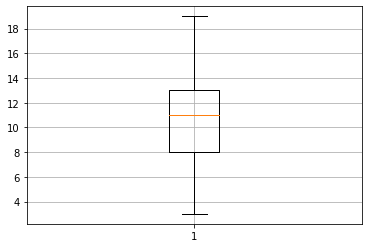

In [22]:
# G1 の成績
plt.boxplot(student_data_math['G1'])
plt.grid(True)

In [23]:
student_data_math['G1'].describe()

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

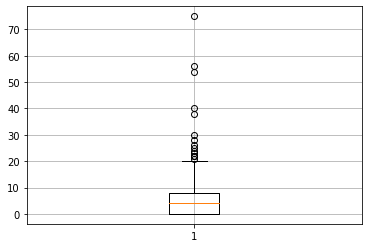

In [24]:
#  欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

In [27]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

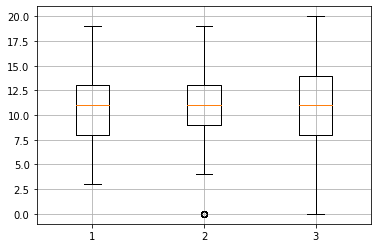

In [26]:
# 連続的なプロットも
plt.boxplot([
    student_data_math['G1'],
    student_data_math['G2'],
    student_data_math['G3']
])
plt.grid(True)

#### 変動係数

スケールの異なる（株価と為替など）を比較するために用いる値、変動係数=標準偏差/平均値

In [28]:
# 欠席日数の変動係数は
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.4018726369879067

In [29]:
# まとめて変動係数！
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

#### 散布図

みたままだと思われます。  
G3 で突然成績 0 が現れますが、多分欠損値です。（業務なら何故欠けてるのかなどの調査をする必要があるそうです）

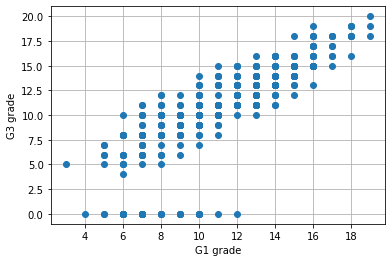

In [30]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

#### 共分散

